In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [6]:
X_train.shape

(426, 30)

In [7]:
X_test.shape

(143, 30)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train = scaler.transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [16]:
estimator = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=5)

In [17]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             verbose=5)

In [18]:
estimator.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [19]:
model = estimator.best_estimator_

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9790209790209791

In [23]:
f1_score(y_test, y_pred)

0.9836065573770492

In [24]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [ 0, 90]])

In [26]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [27]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [28]:
y = f(X[:,0], X[:,1])

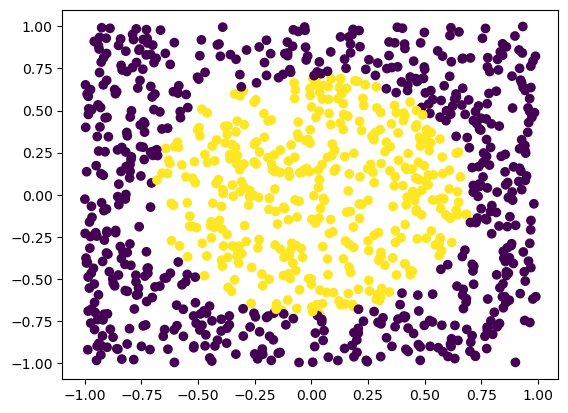

In [29]:
plt.scatter(X[:,0], X[:,1], c=y)

In [30]:
model = SVC(kernel='linear')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [33]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
y_train_pred = model.predict(X_train)

In [35]:
y_test_pred = model.predict(X_test)

In [36]:
accuracy_score(y_train, y_train_pred)

0.6066666666666667

In [37]:
accuracy_score(y_test, y_test_pred)

0.608

In [38]:
model = SVC(kernel='rbf')

In [39]:
model.fit(X_train, y_train)

SVC()

In [40]:
y_train_pred = model.predict(X_train)

In [41]:
accuracy_score(y_train, y_train_pred)

0.984

In [42]:
y_test_pred = model.predict(X_test)

In [43]:
accuracy_score(y_test, y_test_pred)

0.956

In [44]:
print(f'Broj potpornih vekotra za svaku od klasa: {model.n_support_}')

Broj potpornih vekotra za svaku od klasa: [78 75]


In [45]:
print(f'Indeksi instanci koje su potporni vektori: {model.support_}')

Indeksi instanci koje su potporni vektori: [  5  18  20  21  34  43  53  61  72  80  83  89  95 114 120 140 144 154
 155 177 178 184 191 197 199 202 211 217 232 233 240 280 301 308 324 332
 336 348 361 382 383 401 415 422 431 455 458 485 500 502 510 511 540 557
 562 563 577 611 613 619 623 626 641 643 657 659 674 690 691 692 693 697
 705 707 717 728 736 740  15  28  33  45  54  62  74  78 104 107 113 116
 118 127 152 185 194 207 210 235 244 256 258 266 287 291 299 304 314 322
 326 327 337 338 351 352 376 386 387 396 397 408 414 417 420 427 430 438
 448 461 464 480 494 503 524 526 529 533 534 546 551 569 570 585 594 627
 631 632 647 679 696 732 733 738 747]


In [46]:
print(f'Sami potporni vektori: {model.support_vectors_}')

Sami potporni vektori: [[-0.0918143   0.72748451]
 [ 0.69662279  0.27920048]
 [ 0.27640461 -0.69436885]
 [-0.62233213 -0.46648382]
 [ 0.14618342  0.80542048]
 [ 0.70936837  0.16126633]
 [ 0.2398535   0.74487256]
 [ 0.51724943  0.53878788]
 [-0.67865904  0.23281031]
 [ 0.28234086  0.70854298]
 [-0.19094931 -0.72108829]
 [ 0.39951346 -0.58503477]
 [ 0.59596495  0.49844914]
 [-0.69648713  0.257514  ]
 [ 0.7759746   0.04033643]
 [ 0.33049734  0.62954691]
 [ 0.77318432 -0.14845521]
 [ 0.68728845  0.33957678]
 [ 0.04218437  0.71893792]
 [-0.76006431 -0.19042051]
 [ 0.72529345 -0.1657062 ]
 [-0.54791951 -0.47364415]
 [ 0.63842482  0.34693858]
 [ 0.66559189 -0.36726349]
 [-0.12221792 -0.70807268]
 [-0.68267868  0.26710235]
 [ 0.71421114  0.05491918]
 [ 0.70916347 -0.41379938]
 [-0.73775795  0.20899649]
 [-0.16565072 -0.70387515]
 [-0.19809641  0.70865427]
 [-0.57115729 -0.53497624]
 [ 0.52242879  0.48290802]
 [-0.09503809  0.74307423]
 [ 0.20658248 -0.79436339]
 [-0.54541168  0.51768855]
 [ 0.

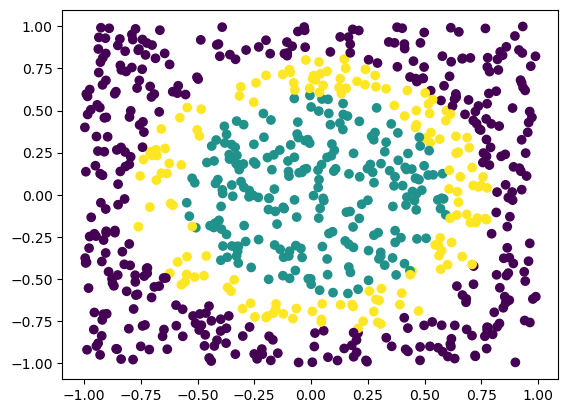

In [47]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()